In [23]:
import os
import pandas as pd
import json
import random
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg


MUESTRA ALEATORIA DEL CONJUNTO: TRAIN


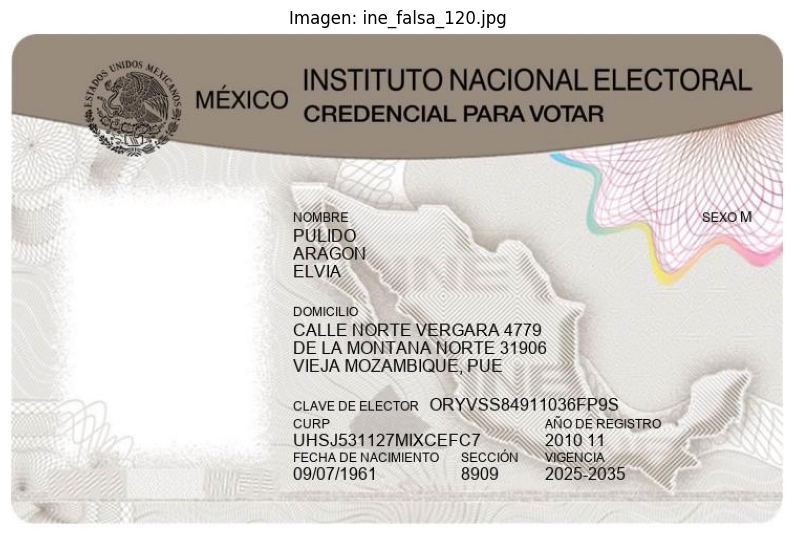


Datos del metadata.jsonl:
  nombre: ELVIA
  segundo_nombre: 
  apellido_paterno: PULIDO
  apellido_materno: ARAGON
  clave_elector: ORYVSS84911036FP9S
  curp: UHSJ531127MIXCEFC7
  fecha_nacimiento: 09/07/1961
  sexo: M
  seccion: 8909
  vigencia_inicio: 2025
  vigencia_fin: 2035
  ano_registro: 2010
  mes_registro: 11
  direccion1: CALLE NORTE VERGARA 4779
  direccion2: DE LA MONTANA NORTE 31906
  direccion3: VIEJA MOZAMBIQUE, PUE
  calle: CALLE NORTE VERGARA
  numero_ext: 4779
  numero_int: 
  colonia: DE LA MONTANA NORTE
  codigo_postal: 31906
  municipio: VIEJA MOZAMBIQUE
  estado: PUE

Datos del DataFrame:
  Archivo_Imagen: ine_falsa_120.jpg
  Nombre: ELVIA
  Segundo Nombre: nan
  Apellido Paterno: PULIDO
  Apellido Materno: ARAGON
  Estado: PUE
  Municipio: VIEJA MOZAMBIQUE
  Colonia: DE LA MONTANA NORTE
  Calle: CALLE NORTE VERGARA
  Numero Ext.: 4779
  Numero Int.: nan
  Codigo Postal: 31906
  CURP: UHSJ531127MIXCEFC7
  Clave Elector: ORYVSS84911036FP9S
  Fecha de Nacimiento: 0

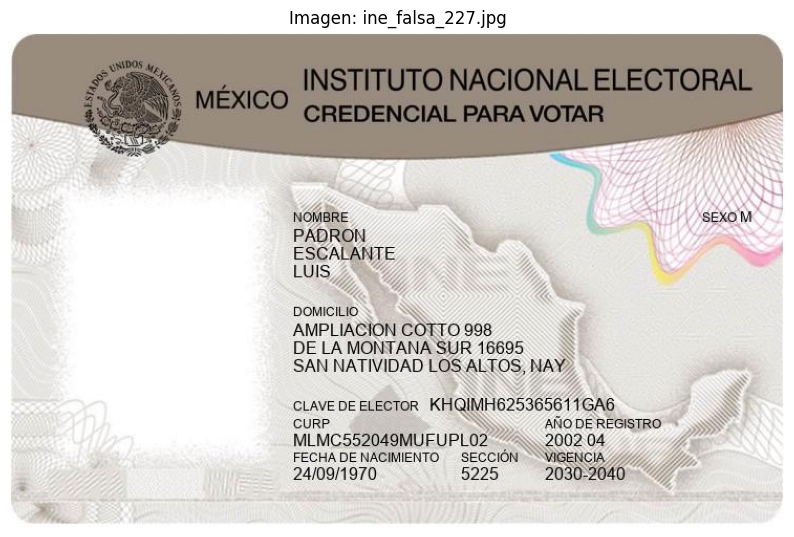


Datos del metadata.jsonl:
  nombre: LUIS
  segundo_nombre: 
  apellido_paterno: PADRON
  apellido_materno: ESCALANTE
  clave_elector: KHQIMH625365611GA6
  curp: MLMC552049MUFUPL02
  fecha_nacimiento: 24/09/1970
  sexo: M
  seccion: 5225
  vigencia_inicio: 2030
  vigencia_fin: 2040
  ano_registro: 2002
  mes_registro: 04
  direccion1: AMPLIACION COTTO 998
  direccion2: DE LA MONTANA SUR 16695
  direccion3: SAN NATIVIDAD LOS ALTOS, NAY
  calle: AMPLIACION COTTO
  numero_ext: 998
  numero_int: 
  colonia: DE LA MONTANA SUR
  codigo_postal: 16695
  municipio: SAN NATIVIDAD LOS ALTOS
  estado: NAY

Datos del DataFrame:
  Archivo_Imagen: ine_falsa_227.jpg
  Nombre: LUIS
  Segundo Nombre: nan
  Apellido Paterno: PADRON
  Apellido Materno: ESCALANTE
  Estado: NAY
  Municipio: SAN NATIVIDAD LOS ALTOS
  Colonia: DE LA MONTANA SUR
  Calle: AMPLIACION COTTO
  Numero Ext.: 998
  Numero Int.: nan
  Codigo Postal: 16695
  CURP: MLMC552049MUFUPL02
  Clave Elector: KHQIMH625365611GA6
  Fecha de Nacimi

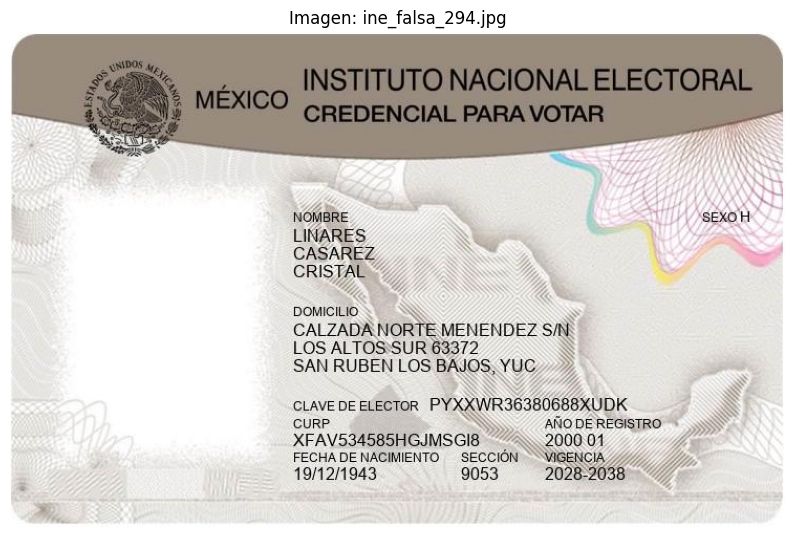


Datos del metadata.jsonl:
  nombre: CRISTAL
  segundo_nombre: 
  apellido_paterno: LINARES
  apellido_materno: CASAREZ
  clave_elector: PYXXWR36380688XUDK
  curp: XFAV534585HGJMSGI8
  fecha_nacimiento: 19/12/1943
  sexo: H
  seccion: 9053
  vigencia_inicio: 2028
  vigencia_fin: 2038
  ano_registro: 2000
  mes_registro: 01
  direccion1: CALZADA NORTE MENENDEZ S/N
  direccion2: LOS ALTOS SUR 63372
  direccion3: SAN RUBEN LOS BAJOS, YUC
  calle: CALZADA NORTE MENENDEZ
  numero_ext: S/N
  numero_int: 
  colonia: LOS ALTOS SUR
  codigo_postal: 63372
  municipio: SAN RUBEN LOS BAJOS
  estado: YUC

Datos del DataFrame:
  Archivo_Imagen: ine_falsa_294.jpg
  Nombre: CRISTAL
  Segundo Nombre: nan
  Apellido Paterno: LINARES
  Apellido Materno: CASAREZ
  Estado: YUC
  Municipio: SAN RUBEN LOS BAJOS
  Colonia: LOS ALTOS SUR
  Calle: CALZADA NORTE MENENDEZ
  Numero Ext.: S/N
  Numero Int.: nan
  Codigo Postal: 63372
  CURP: XFAV534585HGJMSGI8
  Clave Elector: PYXXWR36380688XUDK
  Fecha de Nacimien

In [24]:
def visualizar_muestras():
    """
    Selecciona y muestra una imagen aleatoria de cada conjunto (train, val, test) 
    junto con sus datos correspondientes del archivo metadata.jsonl y el DataFrame.
    """
    # Definir rutas
    BASE_DIR = r"C:\Users\Adrian\Desktop\INEs Dataset"
    SETS_DIR = os.path.join(BASE_DIR, "sets")
    
    # Cargar el DataFrame con todos los datos
    ruta_csv = os.path.join(BASE_DIR, "datos_ines.csv")
    df = pd.read_csv(ruta_csv)
    
    # Para cada conjunto (train, val, test)
    for conjunto in ["train", "validation", "test"]:
        print(f"\n{'='*50}")
        print(f"MUESTRA ALEATORIA DEL CONJUNTO: {conjunto.upper()}")
        print(f"{'='*50}")
        
        # Ruta del conjunto
        carpeta = os.path.join(SETS_DIR, conjunto)
        
        # Buscar archivos de imagen en la carpeta
        archivos_imagen = [f for f in os.listdir(carpeta) 
                          if f.endswith(('.jpg', '.jpeg', '.png')) and os.path.isfile(os.path.join(carpeta, f))]
        
        if not archivos_imagen:
            print(f"No se encontraron imágenes en la carpeta {conjunto}.")
            continue
        
        # Seleccionar un archivo aleatorio
        archivo_aleatorio = random.choice(archivos_imagen)
        
        # Ruta completa de la imagen
        ruta_imagen = os.path.join(carpeta, archivo_aleatorio)
        
        # Cargar metadata.jsonl
        metadata_path = os.path.join(carpeta, "metadata.jsonl")
        datos_metadata = None
        
        if os.path.exists(metadata_path):
            with open(metadata_path, 'r', encoding='utf-8') as f:
                for linea in f:
                    datos = json.loads(linea)
                    if datos["file_name"] == archivo_aleatorio:
                        datos_metadata = datos
                        break
        
        # Buscar en el DataFrame
        fila_df = df[df['Archivo_Imagen'] == archivo_aleatorio]
        
        # Mostrar la imagen
        plt.figure(figsize=(10, 8))
        img = mpimg.imread(ruta_imagen)
        plt.imshow(img)
        plt.title(f"Imagen: {archivo_aleatorio}")
        plt.axis('off')
        plt.show()
        
        # Mostrar datos del metadata.jsonl
        print("\nDatos del metadata.jsonl:")
        if datos_metadata:
            gt_parse = json.loads(datos_metadata["ground_truth"])["gt_parse"]
            for clave, valor in gt_parse.items():
                print(f"  {clave}: {valor}")
        else:
            print("  No se encontraron datos en metadata.jsonl para esta imagen.")
        
        # Mostrar datos del DataFrame
        print("\nDatos del DataFrame:")
        if not fila_df.empty:
            for columna in fila_df.columns:
                print(f"  {columna}: {fila_df[columna].values[0]}")
        else:
            print("  No se encontraron datos en el DataFrame para esta imagen.")

if __name__ == "__main__":
    visualizar_muestras()